In [46]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_stacked_errors_by_date(df):
    """
    Creates a stacked bar chart of error types by string-formatted date.

    Parameters:
    - df: Pandas DataFrame with 'created' (string) and 'error_type' (categorical string)
    """
    # Group and count errors by 'created' date and 'error_type'
    grouped = df.groupby(['created', 'error_type_str']).size().unstack(fill_value=0)

    # Sort rows and columns for consistent plotting
    grouped = grouped.sort_index(axis=0).sort_index(axis=1)

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))

    bottom = None
    colors = plt.cm.tab20.colors  # Up to 20 distinct colors
    error_types = grouped.columns.tolist()

    for i, error_type in enumerate(error_types):
        counts = grouped[error_type]
        ax.bar(grouped.index, counts, bottom=bottom, 
               label=error_type, color=colors[i % len(colors)])
        bottom = counts if bottom is None else bottom + counts

    ax.set_xlabel("Date")
    ax.set_ylabel("Error Count")
    ax.set_title("Stacked Error Types by Date")
    ax.legend(title="Error Type", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_stacked_errors_with_percent_legend(df):
    """
    Plots a stacked bar chart of error types by date string.
    Adds count and percentage in the legend for each error_type.

    Parameters:
    - df: Pandas DataFrame with 'created' and 'error_type' columns (both as strings)
    """
    # Group and count errors
    grouped = df.groupby(['created', 'error_type_str']).size().unstack(fill_value=0)
    grouped = grouped.sort_index(axis=0).sort_index(axis=1)

    # Total number of errors (all types)
    total_samples = grouped.sum().sum()

    # Plot setup
    fig, ax = plt.subplots(figsize=(10, 6))
    bottom = [0] * len(grouped)
    colors = plt.cm.tab20.colors
    error_types = grouped.columns.tolist()

    for i, error_type in enumerate(error_types):
        counts = grouped[error_type]
        total_for_type = counts.sum()
        percent = (total_for_type / total_samples) * 100

        label = f"{error_type} ({total_for_type}, {percent:.1f}%)"

        ax.bar(grouped.index, counts, bottom=bottom,
               label=label, color=colors[i % len(colors)])

        # Update bottom for next stack
        bottom = [btm + val for btm, val in zip(bottom, counts)]

    # Labels and formatting
    ax.set_xlabel("Date")
    ax.set_ylabel("Error Count")
    ax.set_title("Stacked Error Types by Date")
    ax.legend(title="Error Type (Count, % of total)", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def summarize_categorical_columns(df, columns):
    """
    Prints a summary table of unique values, counts, and percentages for given categorical columns.

    Parameters:
    - df: pandas DataFrame
    - columns: list of column names to summarize
    """
    for col in columns:
        print(f"\nColumn: {col}")
        print("-" * (len(col) + 9))
        counts = df[col].value_counts(dropna=False)
        percentages = df[col].value_counts(normalize=True, dropna=False) * 100

        summary = pd.DataFrame({
            'Value': counts.index.astype(str),
            'Count': counts.values,
            'Percentage': percentages.values
        })

        # Format percentage column
        summary['Percentage'] = summary['Percentage'].map("{:.2f}%".format)

        # Print as text table
        print(summary.to_string(index=False))

# Error Characterizer
Enter the number corresponding to the type of error

0. No Error
1. Uncentered Box
2. Severely Uncentered Box
3. Missed Target
4. Blank Box
5. Silt Transpose Error
6. Occlusion [Edge or star]
7. Other
8. Unknown


In [42]:
from pandas_statistics import file_path_loader, PDStatistics_calculator

directory = "/mnt/c/Users/david.chaparro/Documents/Repos/Dataset_Statistics/data/PDS-RME04-2024-08-28"
local_files = file_path_loader(directory)
local_files.characterize_errors()

100%|██████████| 603/603 [1:41:57<00:00, 10.14s/it]


Index(['fits_file', 'sensor', 'QA', 'labeler_id', 'request_id', 'created',
       'updated', 'num_objects', 'error_type', 'error_type_str'],
      dtype='object')

Column: QA
-----------
Value  Count Percentage
False   1108     97.88%
 True     24      2.12%

Column: error_type_str
-----------------------
                   Value  Count Percentage
                No Error    760     67.14%
          Uncentered Box    360     31.80%
Occlusion [Edge or star]      5      0.44%
                 Unknown      2      0.18%
               Blank Box      2      0.18%
                   Other      2      0.18%
           Missed Target      1      0.09%

Column: created
----------------
     Value  Count Percentage
2024-08-28    756     66.78%
2024-09-03    280     24.73%
2024-08-29     96      8.48%


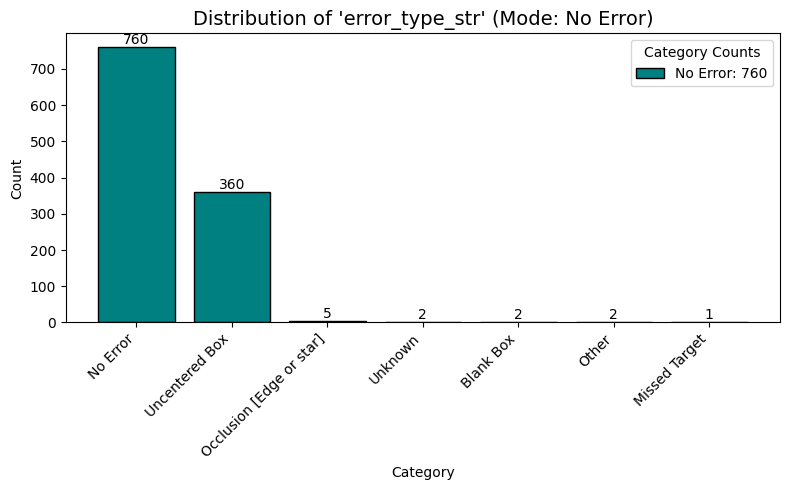

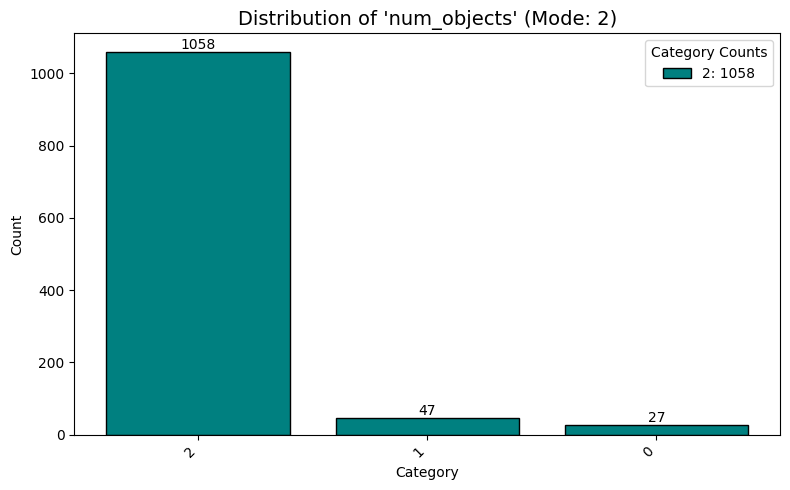

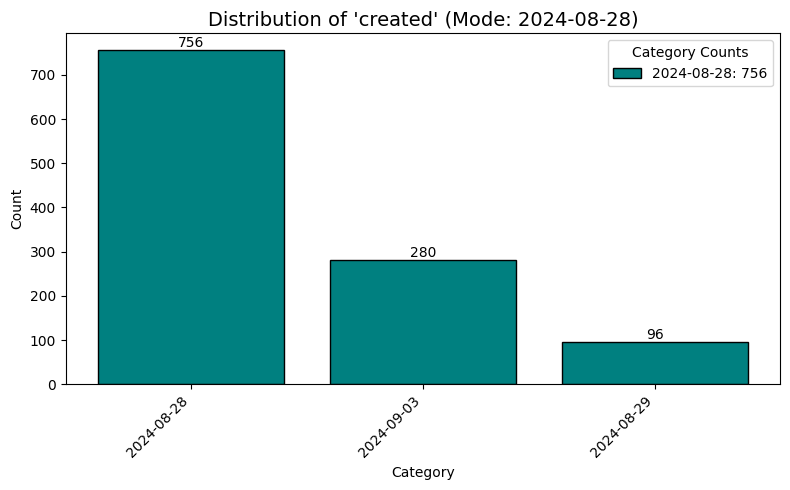

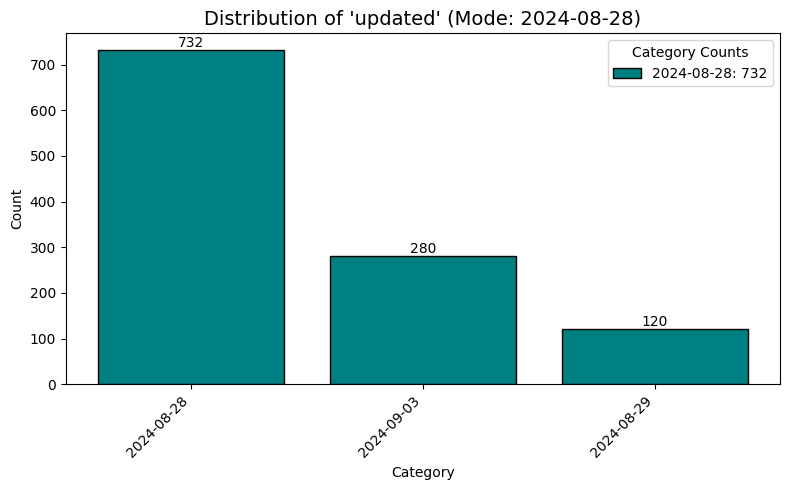

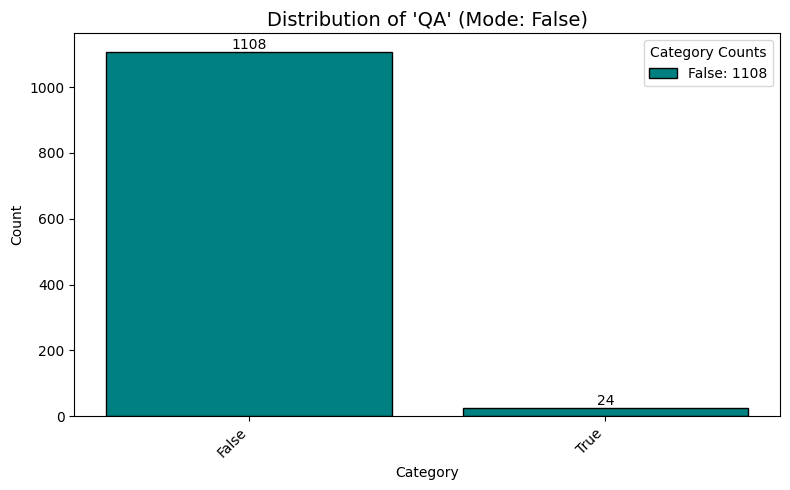

In [49]:
import os
from plots import plot_time_column, plot_categorical_column

# directory = "/mnt/c/Users/david.chaparro/Documents/Repos/Dataset_Statistics/data/LMNT01Satellite-2024-09-19"
directory = "/mnt/c/Users/david.chaparro/Documents/Repos/Dataset_Statistics/data/PDS-RME04-2024-08-28"

error_file = PDStatistics_calculator().load(os.path.join(directory, "errors.pkl"))
errors_dataset = error_file.sample_attributes

error_types = ["No Error", "Uncentered Box", "Severely Uncentered Box", "Missed Target", "Blank Box", "Silt Transpose Error", "Occlusion [Edge or star]", "Other", "Unknown"]
errors_dataset['error_type_str'] = errors_dataset.apply(lambda row: error_types[row['error_type']] if row["error_type"] < len(error_types) else error_types[8], axis=1)

print(errors_dataset.columns)

summarize_categorical_columns(errors_dataset, ["QA", "error_type_str", "created"])
plot_categorical_column(errors_dataset["error_type_str"])
plot_categorical_column(errors_dataset["num_objects"])
plot_categorical_column(errors_dataset["created"])
plot_categorical_column(errors_dataset["updated"])
plot_categorical_column(errors_dataset["QA"])

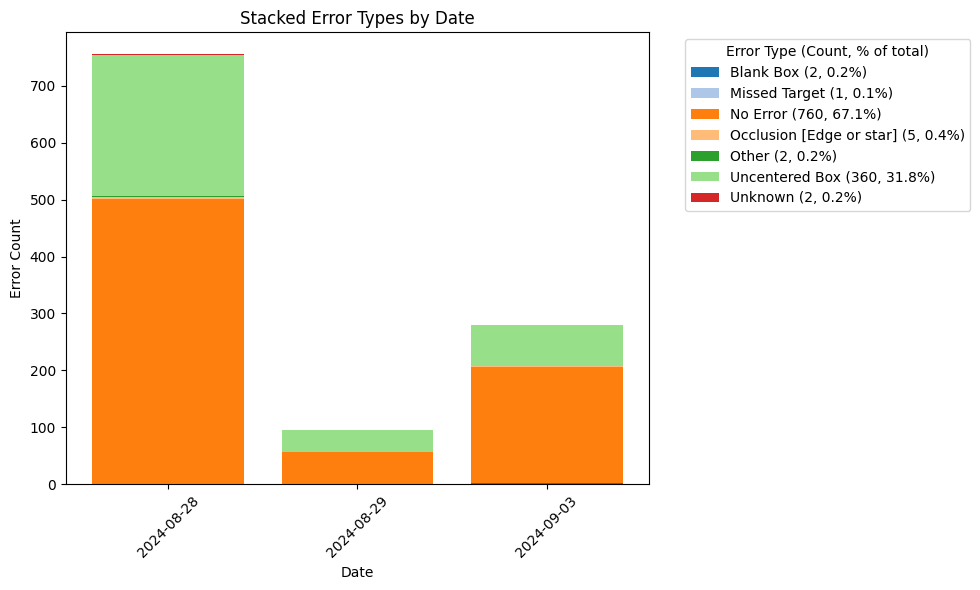

In [50]:
# Plot
plot_stacked_errors_with_percent_legend(errors_dataset)
